# Envelope using Hilbert

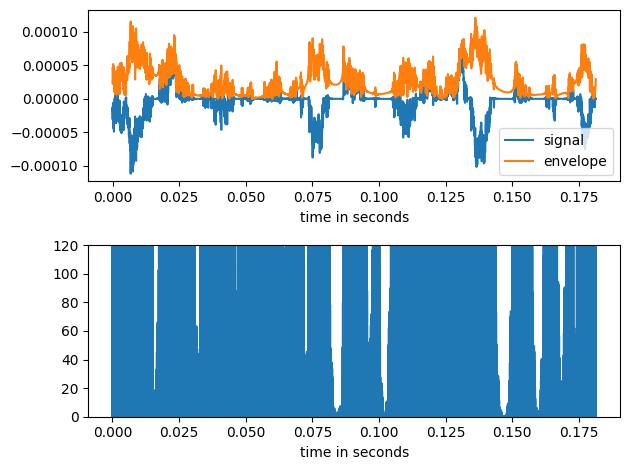

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

import sys
sys.path.append("..")
import plap

input_file = "C:/Users/windo/Documents/ravdess-dataset/Actor_21/03-01-01-01-01-02-21.wav"

# preprocessor = plap.Preprocessor(preemphasis_coeff=None, window_type="hamming")
# fvector = plap.FeatureVector("SC", "LAT", "TC")
# plap.parameterize(audio_path=input_file, fvector=fvector, preprocessor=preprocessor)
# fvector.values

import librosa
signal, sr = librosa.load(input_file)
signal = signal[:4000]
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * sr)


t = np.arange(len(signal)) / sr
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()

(400,)

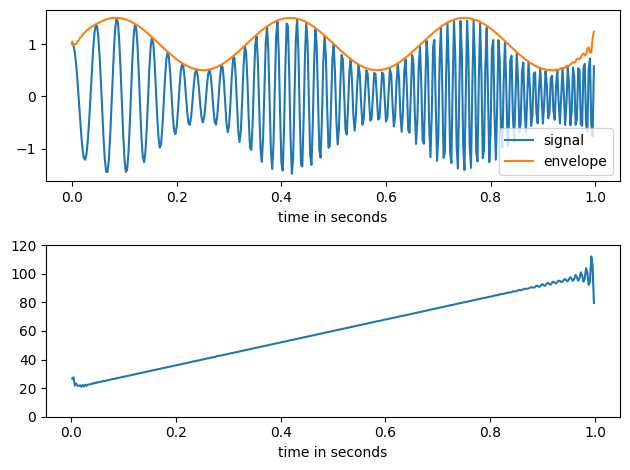

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()

signal.shape

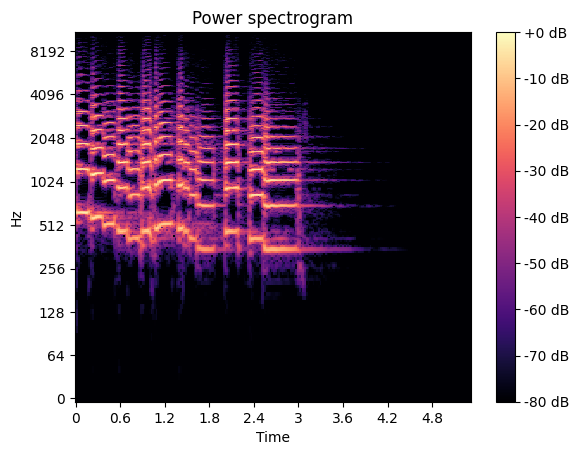

In [32]:
y, sr = librosa.load(librosa.ex('trumpet'))
S = np.abs(librosa.stft(y))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")